In [1]:
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

itter 2000 loss 0.027019018900465187 accuracy 0.8928571428571429


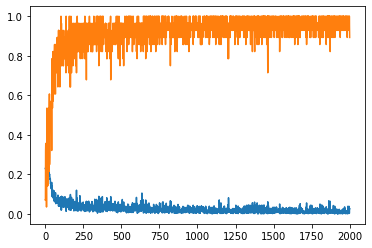

In [2]:
def logsum(x):
    buff = x.max(axis=1)
    return buff + np.log(
        np.exp(
            x - buff.reshape((-1, 1))
        ).sum(axis=1)
    )

def forward_backward(x, y, layer1, layer2):
    # training
    out = np.zeros((len(y),10), np.float32)
    out[range(out.shape[0]),y] = 1

    # forward pass
    relu = np.maximum(x.dot(layer1), 0)
    x_layer2 = relu.dot(layer2)
    x_lsm = x_layer2 - logsum(x_layer2).reshape((-1, 1))
    x_loss = (-out * x_lsm).mean(axis=1)

    # backward pass derivatives
    buff = -out / len(y)
    d_lsm = buff - np.exp(x_lsm) * buff.sum(axis=1).reshape((-1, 1)) # log softmax
    d_layer2 = relu.T.dot(d_lsm)
    d_layer1 = x.T.dot((relu > 0).astype(np.float32) * d_lsm.dot(layer2.T))

    return x_loss, x_layer2, d_layer1, d_layer2

def layer(n, m):
    return np.random.uniform(-1., 1., size=(n,m)) / (n*m)

layer1 = layer(784, 128)
layer2 = layer(128, 10)

alpha = 0.001
losses, accuracies = [], []
for i in range(2001):
    buff = np.random.randint(0, X_train.shape[0], size=(X_train.shape[1]))
    X = X_train[buff].reshape((-1, layer1.shape[0]))
    Y = Y_train[buff]
    x_loss, x_layer2, d_layer1, d_layer2 = forward_backward(X, Y, layer1, layer2 )
    
    # SGD
    layer1 = layer1 - alpha * d_layer1
    layer2 = layer2 - alpha * d_layer2
    
    # res
    accuracy = (np.argmax(x_layer2, axis=1) == Y).mean()
    loss = x_loss.mean()
    losses.append(loss)
    accuracies.append(accuracy)
    
    clear_output(wait=True)
    print(f"itter {i} loss {loss} accuracy {accuracy}")

plt.plot(losses)
plt.plot(accuracies)

Accuracy: 0.9589


<AxesSubplot:title={'center':'Confusion Matrix'}>

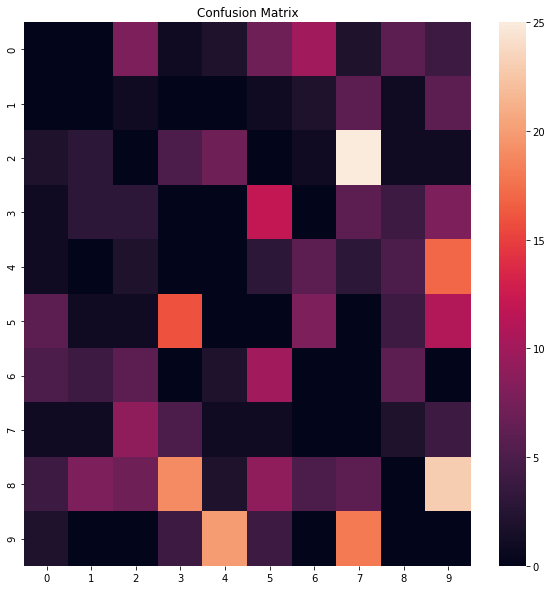

In [6]:
def evaluate(layer1, layer2, Y_test):
    pred = np.argmax(
         np.maximum( 
            X_test.reshape(
                (-1, 28*28)
            ).dot(layer1), 0
        ).dot(layer2), 
        axis = 1
    )
    return pred, (Y_test == pred).mean()
pred, acc = evaluate(layer1, layer2, Y_test)
print(f"Accuracy: {acc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(pred, Y_test)
np.fill_diagonal(conf_mat, 0)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
sns.heatmap(conf_mat)

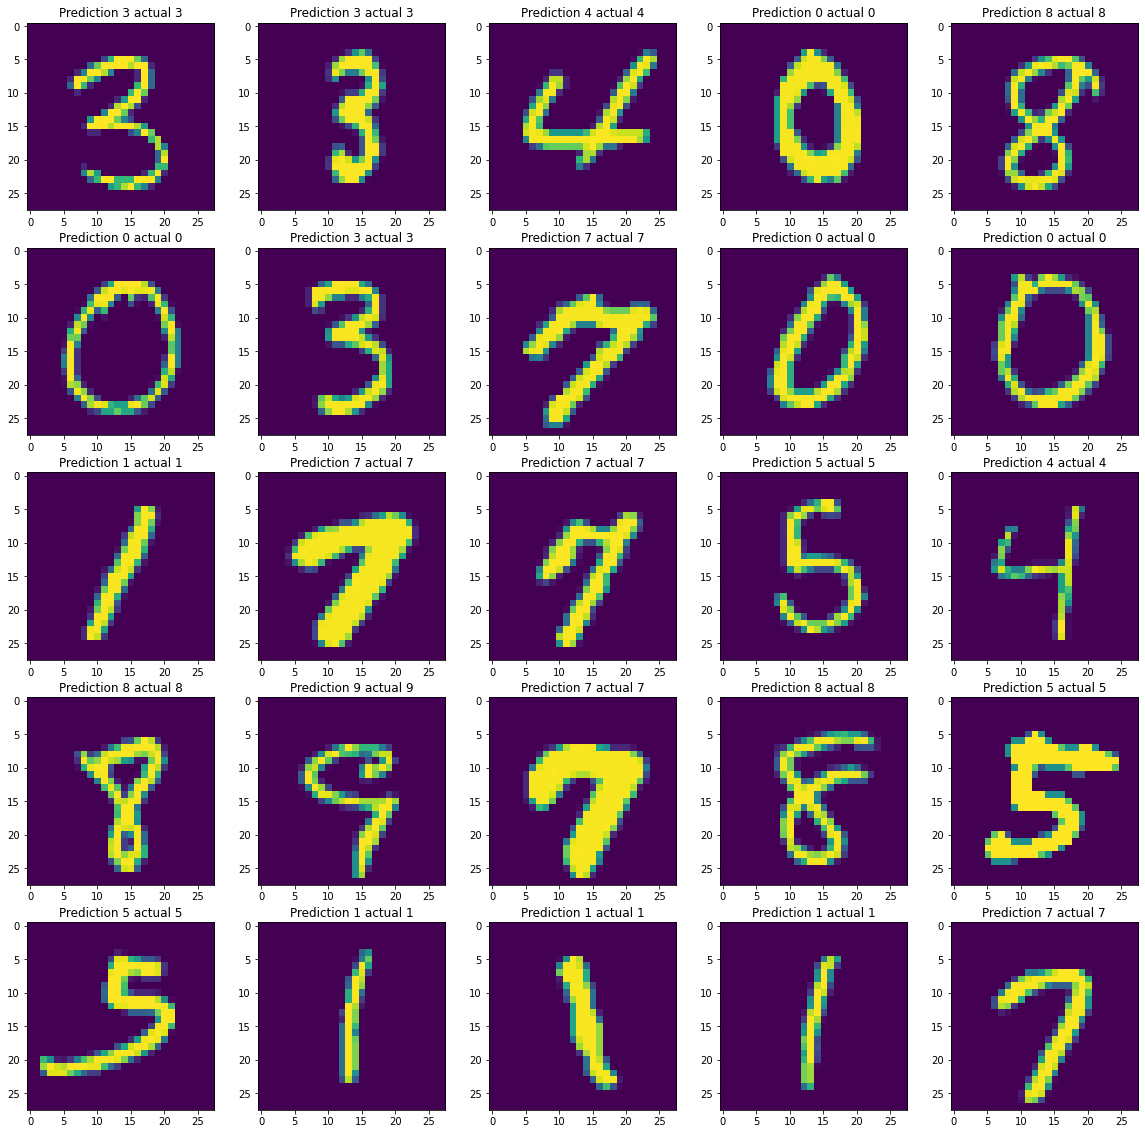

In [5]:
# Check a few 
nrow, ncol= 5, 5
cnt=0


fig = plt.figure(figsize=(20, 20))
for i in range(nrow):
    for j in range(ncol):
        cnt += 1
        samps = np.random.randint(len(X_test))
        sample = X_test[samps].reshape(
                    (-1, 28*28)
                )
        y_samp = Y_test[samps]

        pred = np.argmax(
            np.maximum( 
                sample.dot(layer1), 0
            ).dot(layer2), 
            axis=1
        )
        plt.subplot(nrow, ncol, cnt)
        plt.imshow(sample.reshape(28,28))
        plt.title(f"Prediction {pred[0]} actual {y_samp}")

plt.show()
